# Walmart Recruiting - Store Sales Forecasting
## Technical assestment | Neaam Hariri 


#### Probelm statment
In this recruiting competition, job-seekers are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains many departments, and participants must project the sales for each department in each store. To add to the challenge, selected holiday markdown events are included in the dataset. These markdowns are known to affect sales, but it is challenging to predict which departments are affected and the extent of the impact.

##### Source : [Link to dataset](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/overview)

#### Dataset :    
<ol>
<li>stores.csv</li>
<li>features.csv</li>
<li>train.csv</li>
 <li>sampleSubmission.csv</li>
</ol>

#### table of content 
<ol>
<li>download data</li>
<li>explore data</li>
<li>data cleaning</li>
    <li>visualizing</li>
     <li>findings</li>

</ol>

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



### Loading and exploring the data

In [145]:
#Read CSV file 
df_features = pd.read_csv('features.csv', sep=',')
df_stores = pd.read_csv('stores.csv', sep=',')
df_train = pd.read_csv('train.csv', sep=',')
df_test = pd.read_csv('test.csv', sep=',') 

In [146]:
df_features.info()
df_features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [147]:
df_stores.info()
df_stores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [148]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [149]:
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
Store        115064 non-null int64
Dept         115064 non-null int64
Date         115064 non-null object
IsHoliday    115064 non-null bool
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


### Converting to appropriate datatype, checking null values

In [150]:
# converting date to datetime object 
#df_features['Date'] = df_features['Date'].apply(pd.to_datetime)
print(f"Minimum Date: {min(df_features['Date'])}")
print(f"\nMaximum Date: {max(df_features['Date'])}")

Minimum Date: 2010-02-05

Maximum Date: 2013-07-26


In [151]:
#check null values 
df_features.isnull().sum()


Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [152]:
df_features.fillna(0,inplace=True)
df_features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [153]:
df_features[["Temperature"]] = df_features[["Temperature"]].fillna(df_features[["Temperature"]].mean())
df_features[["Fuel_Price"]] = df_features[["Fuel_Price"]].fillna(df_features[["Fuel_Price"]].mean())
df_features[["CPI"]] = df_features[["CPI"]].fillna(df_features[["CPI"]].mean())

In [154]:
df_features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [155]:
print(f"Minimum Date: {min(df_train['Date'])}")
print(f"\nMaximum Date: {max(df_train['Date'])}")

Minimum Date: 2010-02-05

Maximum Date: 2012-10-26


In [156]:
df_train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

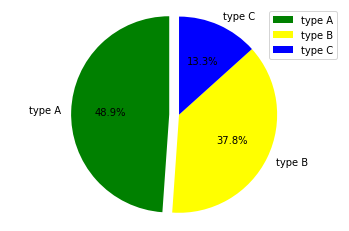

In [157]:
labels = 'type A','type B','type C'
sizes = [(df_stores.Type.value_counts()['A']/(45))*100,(df_stores.Type.value_counts()['B']/(45))*100,(df_stores.Type.value_counts()['C']/(45))*100]
colors = ['green', 'yellow', 'blue']
explode = (0.1, 0, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%.1f%%', shadow=False, startangle=90)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

In [158]:
df_stores.Type.value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

### Merging stores, features, train in one dateframe

In [159]:
df_features_stores = df_features.merge(df_stores, how='inner', on='Store')
df = df_train.merge(df_features_stores, how='inner', on=['Store','Date','IsHoliday'])

df['Date'] = pd.to_datetime(df['Date'])



df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 51.9+ MB


In [160]:
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["week"] = df["Date"].dt.month

### sales visualizations

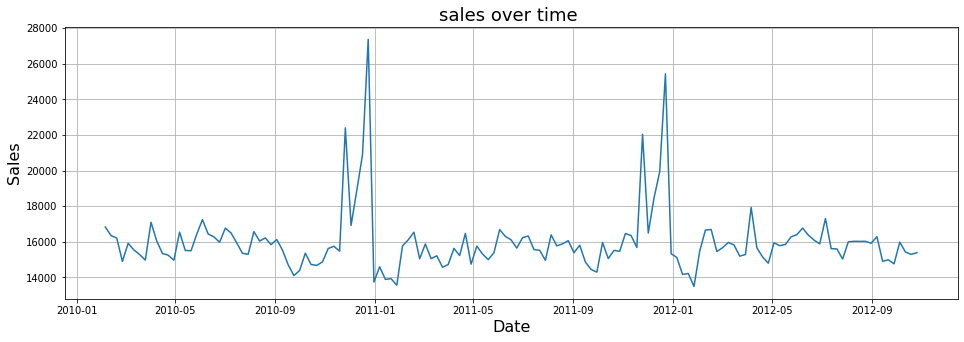

In [161]:
sales_date = df['Weekly_Sales'].groupby(df['Date']).mean()

plt.figure(figsize=(16,5))
sns.lineplot(weekly_sales_mean.index, weekly_sales_mean.values)

plt.grid()
plt.title('sales over time ', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

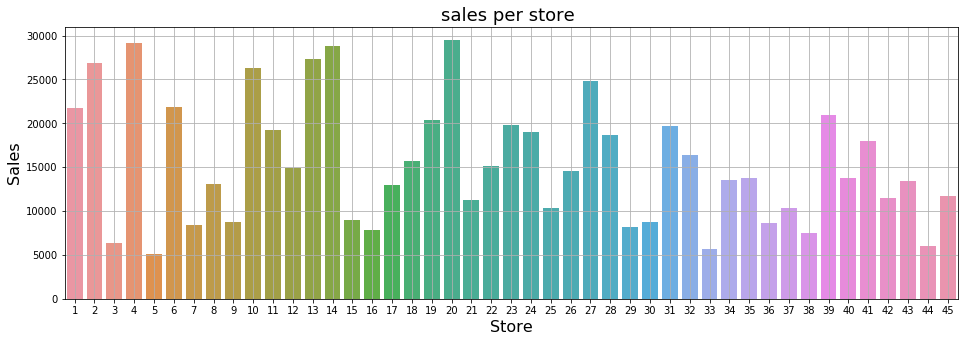

In [162]:
sales_store = df['Weekly_Sales'].groupby(df['Store']).mean()

plt.figure(figsize=(16,5))
sns.barplot(sales_store.index, sales_store.values)

plt.grid()
plt.title('sales per store ', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()


In [163]:
sales_store.min()


5053.415812868089

In [164]:
sales_store.max()

29508.30159193265

In [165]:
sales_store.max() - sales_store.min()

24454.88577906456

In [166]:
df.groupby("Type")["Weekly_Sales"].mean()

Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: Weekly_Sales, dtype: float64

In [167]:
# # Figure Size
# fig = plt.figure(figsize =(10, 7))
# # Horizontal Bar Plot
# plt.bar(df.Store, df.Weekly_Sales)
# # Show Plot
# plt.show()

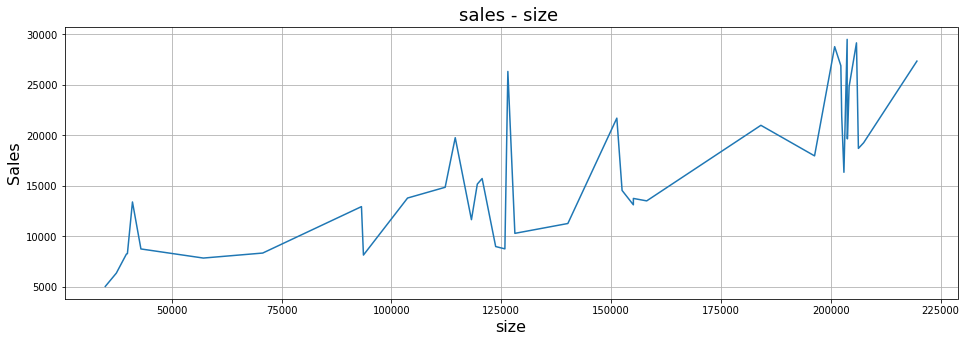

In [168]:
hol = df['Weekly_Sales'].groupby(df['Size']).mean()

plt.figure(figsize=(16,5))
sns.lineplot(hol.index, hol.values)

plt.grid()
plt.title('sales - size ', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('size', fontsize=16)
plt.show()


0.015810449498679695


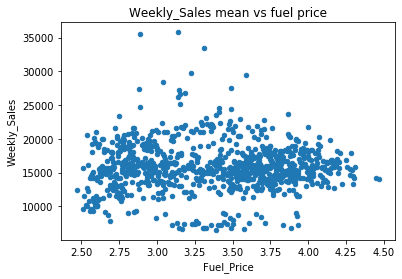

In [169]:

hol = df.groupby("Fuel_Price")["Weekly_Sales"].mean().reset_index()
print(hol["Fuel_Price"].corr(hol["Weekly_Sales"]))
hol.plot.scatter("Fuel_Price", "Weekly_Sales", title="Weekly_Sales mean vs fuel price")


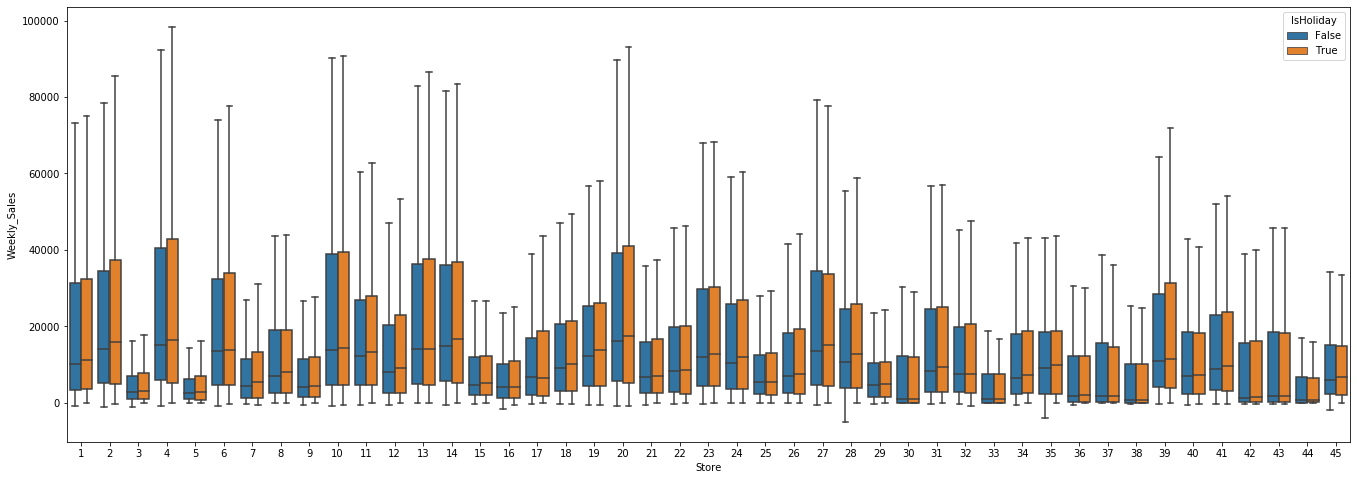

In [170]:
data = pd.concat([df['Store'], df['Weekly_Sales'], df['IsHoliday']], axis=1)
f, ax = plt.subplots(figsize=(23, 8))
fig = sns.boxplot(x='Store', y='Weekly_Sales', data=data, showfliers=False, hue="IsHoliday")

### We can see that holidays have higher weekly sales than non holidays  

-0.018861475583658933


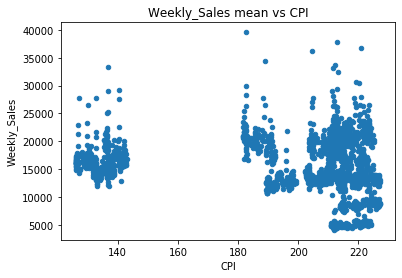

In [171]:

CPI_corr = df.groupby("CPI")["Weekly_Sales"].mean().reset_index()
print(CPI_corr["CPI"].corr(hol["Weekly_Sales"]))
CPI_corr.plot.scatter("CPI", "Weekly_Sales", title="Weekly_Sales mean vs CPI")


In [173]:
holidays = df[['Weekly_Sales','Date','week','year','IsHoliday']]
holidays = holidays.loc[holidays['IsHoliday']==True].drop_duplicates()
holidays.head()

,Weekly_Sales,Date,week,year,IsHoliday
73,46039.49,2010-02-12,2,2010,True
74,44682.74,2010-02-12,2,2010,True
75,10887.84,2010-02-12,2,2010,True
76,35351.21,2010-02-12,2,2010,True
77,29620.81,2010-02-12,2,2010,True


##### 1- no correlation bteween sales and CPI or Fuel price 
##### 2- holidays have higher sales 
##### 3- bigger stores have higher sales over time 
##### 4- type A of stoers have the highest sales avarege while C have the lowst (logiclly because A is 48% of stores type)
#####  5- 24454.88577906456 is the different between the minimum (store 5) store's sales and the maximum (store 20)
#####  6- end of years have high weekly sales while first months have low weekly sales 